In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [14]:
df = pd.read_csv(r"C:\Users\dell\Desktop\HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
df.shape

(14999, 10)

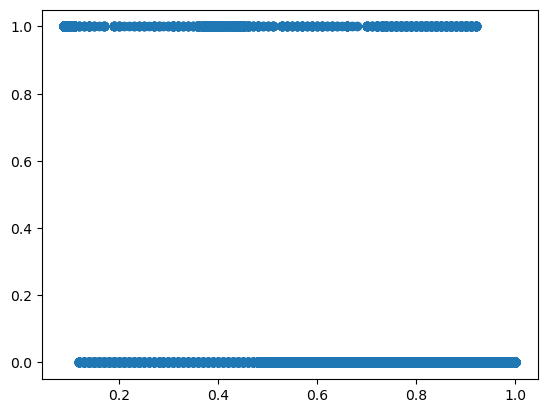

In [46]:
plt.scatter(df.satisfaction_level,df.left)

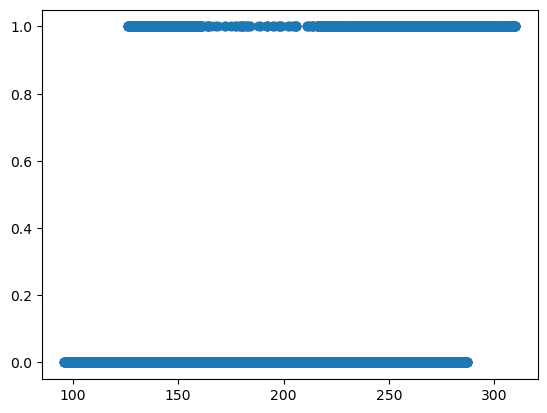

In [47]:
plt.scatter(df.average_montly_hours,df.left)

In [3]:
df['left'].count()

14999

In [4]:
df.left.unique()

array([1, 0], dtype=int64)

In [7]:
left = df[df.left==1]
left.shape

(3571, 10)

In [10]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [11]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

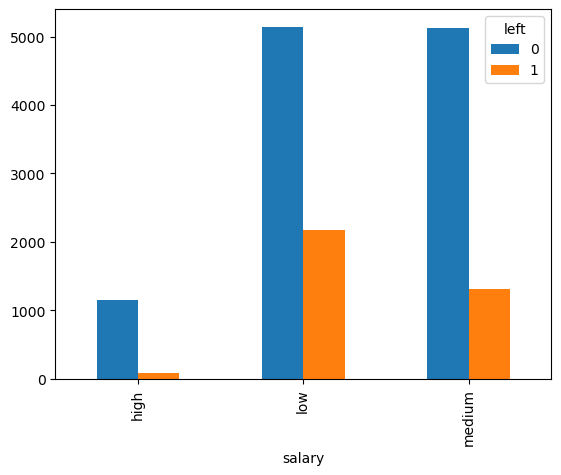

In [12]:
pd.cros(df.salary,df.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

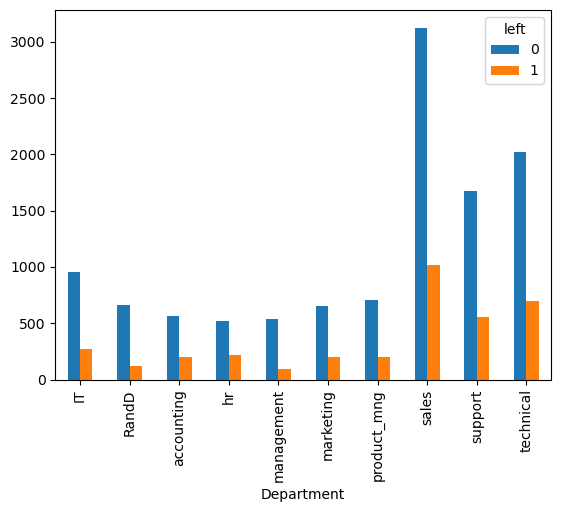

In [13]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [19]:
df1 = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [20]:
salary_dummies = pd.get_dummies(df1['salary'])
salary_dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [22]:
df2 = pd.concat([df1,salary_dummies],axis = 1)

In [23]:
df2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [25]:
df3 = df2.drop(['salary','medium'],axis =1)

In [27]:
x = df3
y = df['left']

In [28]:
x

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1
...,...,...,...,...,...
14994,0.40,151,0,0,1
14995,0.37,160,0,0,1
14996,0.37,143,0,0,1
14997,0.11,280,0,0,1


In [29]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.3)

In [34]:
x_train.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
14444,0.42,134,0,0,1
5805,0.40,188,0,0,1
7022,0.85,201,0,0,0
1376,0.74,222,0,0,1
13885,0.95,199,0,0,0


In [35]:
x_train.count()

satisfaction_level       4499
average_montly_hours     4499
promotion_last_5years    4499
high                     4499
low                      4499
dtype: int64

In [37]:
x_train.sum()

satisfaction_level         2750.64
average_montly_hours     905310.00
promotion_last_5years        98.00
high                        377.00
low                        2174.00
dtype: float64

In [38]:
x_train.count()+x_test.count()

satisfaction_level       14999
average_montly_hours     14999
promotion_last_5years    14999
high                     14999
low                      14999
dtype: int64

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [41]:
model.fit(x_train,y_train)

LogisticRegression()

In [42]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
y_test

2625     0
14544    1
2165     0
10696    0
7695     0
        ..
3995     0
3032     0
12093    1
3159     0
5120     0
Name: left, Length: 10500, dtype: int64

In [45]:
model.score(x_train,y_train)

0.781729273171816

In [48]:
import pickle
with open('Employee Retention Model','wb') as f:
    pickle.dump(model,f)